
## Kort om att gå från R till Python

- Ni förväntas inte kunna skriva Python-kod, men ni kommer delvis känna igen arbetssättet från R


- Python är likt R ett populärt open source-språk inom data science, det är bra att få en inblick även i detta språk



- Vi kör koden i en "Jupyter Notebook", även det populärt inom Data Science. Notebooks stödjer både Python och R




#### Python
- "General-purpose" programmeringsspråk - data science bara ett applikationsområde
- Förlåtande för nybörjare, men därav mer risk för implicita fel, ex, "123" * 3
- Tacksamt att implementera, många data engineers kan python 
- TVINGAR dig att skriva prydligt, får felmeddelande utan korrekt indentering

- Python har betydligt sämre paket för klassisk statistik och regression jämfört med R, regression i populära Scikitlearn ger inte ens p-värden


#### R
- Fokuserat och mer utvecklat för Statistisk programmering
- Oförlåtande för nybörjare, mindre risk för implicita fel - exempelvis mean(x, na.rm=TRUE), beräkningar kan enbart göras på tillåtna datatyper
- bättre för visualiseringar med ggplot2
- Trevlig app och rapport-generering med knitr och Shiny




### Snabba exempel

- "<-" i R ersätts med "=" i Python 

(precis som i R är "==" det man använder som lika med-tecken

In [1]:
#Kör denna cell med "Shift + Enter"
siffra_python = 1+2 
print(siffra_python)

3


In [5]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


##### Förlåtande

- Python är förlåtande för nybörjare, men därav mer risk för implicita fel, ex, "123" * 3 fungerar, men är inte en matematisk operation

In [2]:
#Det går att multiplicera strängen "123" i python, men det är inte en matematisk operation
strang_ggr_num = "123"*3
print(strang_ggr_num)

123123123


##### Prydlighet

Nedan fungerar, det är korrekt med indenteringen efter både for och if-satsen

In [3]:
for i in [1,2]:
    print(i)
    if(i==2):
        print("Slut")

1
2
Slut


Nedan fungerar inte, vi får IndentationError då vi inte indenterat efter if-satsen

In [4]:
for i in [1,2]:
    print(i)
    if(i==2):
    print("Slut")

IndentationError: expected an indented block (<ipython-input-4-95df71d784a5>, line 4)

##### Dokumentation av funktioner

In [5]:
strang_ggr_num = "123"*3

#Placera markören efter punkten nedan, tryck sedan på tab-tangenten
#Du ser nu vad för funktioner du kan använda
strang_ggr_num.

#Placera markören inne i parentesen, tryck "shift + tab"
#Du ser nu dokumentation av funktionen
strang_ggr_num.isdigit()

SyntaxError: invalid syntax (<ipython-input-5-874923e39036>, line 5)

## Övning 1: Enkel logistisk modell

I denna övning testar vi att göra en enkel logistisk modell utifrån Iris-datasetet

### Importera bibliotek

Vi importerar de python-bibliotek som vi behöver för att bearbeta vårt dataset

- numpy används för matrisberäkningar, extremt vanligt att använda tillsammans med pandas
- matplotlib för grafer

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Hjälpfunktioner

- Används senare för att plotta modellutvärdering

In [2]:
def plot_training():
    
    print("accuracy, train: ", history.history['accuracy'][-1])
    print("accuracy, test: ", history.history['val_accuracy'][-1])
    
    # Credd : https://janakiev.com/notebooks/keras-iris/
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Iris-data med 2 klasser 

## Data import & preparering

 Vi importerar vid bibliotek från sklearn, ett mycket populärt bibiliotek för typiska funktioner inom data science
 
 - load_iris för att hämta iris-data
 - train_test_split för att enkelt dela upp data i train och test
 - Onehotencoder för att skapa target-variaber som är dummies
 - StandardScaler för att senare normalisera input data

In [5]:
# Datapreparering är importerad från : https://janakiev.com/notebooks/keras-iris/
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Bestämmer seed inför sampling
seed = 444
#Anger seed för tensorflow respektive numpy-beräkningar
tf.random.set_seed(seed)
np.random.seed(seed)


Vi hämtar iris-datasetet som vi arbetat med tidigare

- Vi har oberoende variablerna 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)' och 'petal width (cm)'
- Vi vill klassificera om blomman är versicolor(Y=1) eller inte (Y=0)

In [7]:
#Hämtar iris-data
iris = load_iris()
X = iris['data'][0:100] # Hämta endast 100 observationer
y = iris['target'][0:100]
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding (= skapar dummy-varibler)
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Standardiserar data till medelvärde 0 och varians 1 
# Standardisering av värden hjälper neurala nätverk att konvergera
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\DavidRyden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


 Delar upp data i training och test

In [5]:
# Vi delar upp data test i train och test
X_train, X_test, Y_train_, Y_test_ = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

#Vi skapar variabler för antalet features och klasser, används till neurala nätverket
n_features = X.shape[1]
n_classes = Y.shape[1]

# Anpassa format för binär klassificering (1 target variabel)
Y_train = Y_train_[:,1].reshape(50,1)
Y_test = Y_test_[:,1].reshape(50,1)

print("n_features : " + str(n_features))
print("n_classes : " + str(n_classes))


print( "\n Standardiserade features: \n",feature_names,"\n",X_train[0:3])
print ("\nY (1=Versicolor)","\n", Y_train[0:3])


n_features : 4
n_classes : 2

 Standardiserade features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 [[-0.89430898  0.00209934 -0.94364311 -1.21994552]
 [ 0.35866332 -0.41776955  0.92838951  0.91406997]
 [-0.5810659   0.84183714 -1.01297765 -0.86427627]]

Y (1=Versicolor) 
 [[0.]
 [1.]
 [0.]]


# Logistisk regression (sigmoid aktivering)

Vi skapar nu en logistisk regression med ett neuralt nätverk:

- Vi använder "tensorflow" som "backend" till vårt neurala nätverk
- Paketet "keras" som numera finns i tensorflow används som "frontend"

- Vi skapar ett sekventiellt neuralt nätverk (funktionen "Sequential()" )

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.regularizers import L1L2
#from tensorflow.keras.optimizers import RMSprop

#Sekventiellt neuralt nätverk
logistic_regression_model = Sequential()


I vårt tomma sekventiella nätverk lägger vi till ett "Dense"/"fully connected" hidden layer:

1. Detta lager tar 4 dimensoner som input (våra oberoende variabler)

2. Ger 1 dimension output på mellan 0-1, efter sannolikhet att observationen är versicolor

In [12]:
logistic_regression_model.add(Dense(1, input_dim=n_features, activation='sigmoid'))



 I kompilering anger vi övriga val:
- Optimizer = sgd (stochastic gradient descent:    theta(t+1) = theta(t) - learning_rate * gradient)
- Loss-funktion = binary crossentropy, då vi har binär output-variabel
- Den metric vi optimerar för är accuracy

In [8]:
logistic_regression_model.compile(optimizers='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])


Summering av vår skapade modell

In [9]:
logistic_regression_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


# Träna modell

Vi tränar modellen i 500 epoker med funktion fit()

För varje epok ser vi hur loss och accuracy förändras på både vårt train och validation-dataset

In [10]:
# i "history" sparar vi treäningshistoriken som används vid utvärdering av modellen
history = logistic_regression_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))


Train on 50 samples, validate on 50 samples
Epoch 1/500
50/50 [==============================] - 3s 56ms/sample - loss: 1.0067 - accuracy: 0.0000e+00 - val_loss: 1.0212 - val_accuracy: 0.0000e+00
Epoch 2/500
50/50 [==============================] - 0s 369us/sample - loss: 0.9963 - accuracy: 0.0000e+00 - val_loss: 1.0135 - val_accuracy: 0.0000e+00
Epoch 3/500
50/50 [==============================] - 0s 330us/sample - loss: 0.9891 - accuracy: 0.0000e+00 - val_loss: 1.0071 - val_accuracy: 0.0000e+00
Epoch 4/500
50/50 [==============================] - 0s 427us/sample - loss: 0.9829 - accuracy: 0.0000e+00 - val_loss: 1.0014 - val_accuracy: 0.0000e+00
Epoch 5/500
50/50 [==============================] - 0s 407us/sample - loss: 0.9774 - accuracy: 0.0000e+00 - val_loss: 0.9962 - val_accuracy: 0.0000e+00
Epoch 6/500
50/50 [==============================] - 0s 397us/sample - loss: 0.9724 - accuracy: 0.0000e+00 - val_loss: 0.9912 - val_accuracy: 0.0000e+00
Epoch 7/500
50/50 [====================

50/50 [==============================] - 0s 389us/sample - loss: 0.6082 - accuracy: 0.7400 - val_loss: 0.6182 - val_accuracy: 0.7000
Epoch 113/500
50/50 [==============================] - 0s 544us/sample - loss: 0.6055 - accuracy: 0.7400 - val_loss: 0.6153 - val_accuracy: 0.7000
Epoch 114/500
50/50 [==============================] - 0s 335us/sample - loss: 0.6027 - accuracy: 0.7600 - val_loss: 0.6125 - val_accuracy: 0.7000
Epoch 115/500
50/50 [==============================] - 0s 412us/sample - loss: 0.6000 - accuracy: 0.7600 - val_loss: 0.6097 - val_accuracy: 0.7000
Epoch 116/500
50/50 [==============================] - 0s 335us/sample - loss: 0.5972 - accuracy: 0.7600 - val_loss: 0.6068 - val_accuracy: 0.7000
Epoch 117/500
50/50 [==============================] - 0s 487us/sample - loss: 0.5944 - accuracy: 0.7600 - val_loss: 0.6041 - val_accuracy: 0.7000
Epoch 118/500
50/50 [==============================] - 0s 390us/sample - loss: 0.5917 - accuracy: 0.7600 - val_loss: 0.6012 - val_ac

Epoch 168/500
50/50 [==============================] - 0s 330us/sample - loss: 0.4681 - accuracy: 0.9600 - val_loss: 0.4723 - val_accuracy: 0.9200
Epoch 169/500
50/50 [==============================] - 0s 337us/sample - loss: 0.4659 - accuracy: 0.9600 - val_loss: 0.4699 - val_accuracy: 0.9200
Epoch 170/500
50/50 [==============================] - 0s 426us/sample - loss: 0.4637 - accuracy: 0.9600 - val_loss: 0.4676 - val_accuracy: 0.9200
Epoch 171/500
50/50 [==============================] - 0s 378us/sample - loss: 0.4616 - accuracy: 0.9600 - val_loss: 0.4652 - val_accuracy: 0.9200
Epoch 172/500
50/50 [==============================] - 0s 398us/sample - loss: 0.4593 - accuracy: 0.9600 - val_loss: 0.4628 - val_accuracy: 0.9200
Epoch 173/500
50/50 [==============================] - 0s 366us/sample - loss: 0.4572 - accuracy: 0.9600 - val_loss: 0.4606 - val_accuracy: 0.9200
Epoch 174/500
50/50 [==============================] - 0s 369us/sample - loss: 0.4550 - accuracy: 0.9600 - val_loss: 0

Epoch 224/500
50/50 [==============================] - 0s 485us/sample - loss: 0.3581 - accuracy: 1.0000 - val_loss: 0.3563 - val_accuracy: 1.0000
Epoch 225/500
50/50 [==============================] - 0s 334us/sample - loss: 0.3563 - accuracy: 1.0000 - val_loss: 0.3544 - val_accuracy: 1.0000
Epoch 226/500
50/50 [==============================] - 0s 360us/sample - loss: 0.3546 - accuracy: 1.0000 - val_loss: 0.3526 - val_accuracy: 1.0000
Epoch 227/500
50/50 [==============================] - 0s 326us/sample - loss: 0.3529 - accuracy: 1.0000 - val_loss: 0.3507 - val_accuracy: 1.0000
Epoch 228/500
50/50 [==============================] - 0s 360us/sample - loss: 0.3513 - accuracy: 1.0000 - val_loss: 0.3490 - val_accuracy: 1.0000
Epoch 229/500
50/50 [==============================] - 0s 348us/sample - loss: 0.3495 - accuracy: 1.0000 - val_loss: 0.3472 - val_accuracy: 1.0000
Epoch 230/500
50/50 [==============================] - 0s 322us/sample - loss: 0.3478 - accuracy: 1.0000 - val_loss: 0

Epoch 335/500
50/50 [==============================] - 0s 370us/sample - loss: 0.2086 - accuracy: 1.0000 - val_loss: 0.1992 - val_accuracy: 1.0000
Epoch 336/500
50/50 [==============================] - 0s 372us/sample - loss: 0.2076 - accuracy: 1.0000 - val_loss: 0.1981 - val_accuracy: 1.0000
Epoch 337/500
50/50 [==============================] - 0s 362us/sample - loss: 0.2066 - accuracy: 1.0000 - val_loss: 0.1970 - val_accuracy: 1.0000
Epoch 338/500
50/50 [==============================] - 0s 326us/sample - loss: 0.2056 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 1.0000
Epoch 339/500
50/50 [==============================] - 0s 305us/sample - loss: 0.2046 - accuracy: 1.0000 - val_loss: 0.1949 - val_accuracy: 1.0000
Epoch 340/500
50/50 [==============================] - 0s 391us/sample - loss: 0.2036 - accuracy: 1.0000 - val_loss: 0.1938 - val_accuracy: 1.0000
Epoch 341/500
50/50 [==============================] - 0s 367us/sample - loss: 0.2026 - accuracy: 1.0000 - val_loss: 0

Epoch 391/500
50/50 [==============================] - 0s 513us/sample - loss: 0.1590 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 1.0000
Epoch 392/500
50/50 [==============================] - 0s 350us/sample - loss: 0.1582 - accuracy: 1.0000 - val_loss: 0.1470 - val_accuracy: 1.0000
Epoch 393/500
50/50 [==============================] - 0s 385us/sample - loss: 0.1574 - accuracy: 1.0000 - val_loss: 0.1463 - val_accuracy: 1.0000
Epoch 394/500
50/50 [==============================] - 0s 420us/sample - loss: 0.1567 - accuracy: 1.0000 - val_loss: 0.1454 - val_accuracy: 1.0000
Epoch 395/500
50/50 [==============================] - 0s 423us/sample - loss: 0.1559 - accuracy: 1.0000 - val_loss: 0.1447 - val_accuracy: 1.0000
Epoch 396/500
50/50 [==============================] - 0s 334us/sample - loss: 0.1552 - accuracy: 1.0000 - val_loss: 0.1438 - val_accuracy: 1.0000
Epoch 397/500
50/50 [==============================] - 0s 340us/sample - loss: 0.1544 - accuracy: 1.0000 - val_loss: 0

Epoch 447/500
50/50 [==============================] - 0s 380us/sample - loss: 0.1214 - accuracy: 1.0000 - val_loss: 0.1094 - val_accuracy: 1.0000
Epoch 448/500
50/50 [==============================] - 0s 360us/sample - loss: 0.1208 - accuracy: 1.0000 - val_loss: 0.1088 - val_accuracy: 1.0000
Epoch 449/500
50/50 [==============================] - 0s 354us/sample - loss: 0.1202 - accuracy: 1.0000 - val_loss: 0.1082 - val_accuracy: 1.0000
Epoch 450/500
50/50 [==============================] - 0s 374us/sample - loss: 0.1196 - accuracy: 1.0000 - val_loss: 0.1076 - val_accuracy: 1.0000
Epoch 451/500
50/50 [==============================] - 0s 394us/sample - loss: 0.1191 - accuracy: 1.0000 - val_loss: 0.1070 - val_accuracy: 1.0000
Epoch 452/500
50/50 [==============================] - 0s 306us/sample - loss: 0.1185 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 1.0000
Epoch 453/500
50/50 [==============================] - 0s 363us/sample - loss: 0.1180 - accuracy: 1.0000 - val_loss: 0

#### Utvärdera modell
Vi utvärderar accuracy och loss i modellen:

- Vad ser vi för skillnader mellan train och test set?


accuracy, train:  1.0
accuracy, test:  1.0


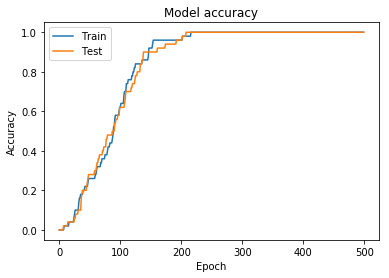

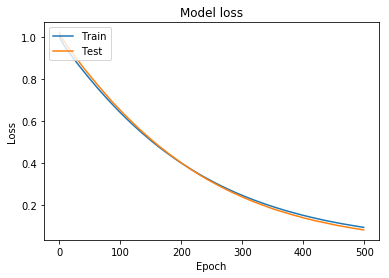

In [14]:
plot_training()

#### Prediktion och tolkning

Vi predicerar de 5 första observationerna från vårt test-data

In [15]:
np.set_printoptions(precision=3)

# Anger vilken kategori , tillbaka till 0 = 'setosa' 1 = 'versicolor', 2 = 'virginica'
category = logistic_regression_model.predict_classes(X_test[0:5])

probabilities = logistic_regression_model.predict_proba(X_test[0:5])


print("\nPredicerad kategori\n",category)

print("\nSannolikheter bakom prediktioner\n Versicolor = 1","\n",probabilities)

print("\nDen sanna kategorin\n",Y_test[0:5])


Predicerad kategori
 [[1]
 [0]
 [1]
 [0]
 [1]]

Sannolikheter bakom prediktioner
 Versicolor = 1 
 [[0.807]
 [0.268]
 [0.887]
 [0.472]
 [0.516]]

Den sanna kategorin
 [[1.]
 [0.]
 [1.]
 [0.]
 [0.]]


# Multinomialt problem - Iris med 3 klasser 

 Vi utökar övningen till identifiering av alla 3 klasser: 'setosa', 'versicolor' och 'virginica'
 
Vi förändrar input data:
- Istället för EN dummy-variabel (1=Versicolor) är vårt Y nu 3 dummy-variabler

# Data import & preparering

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding (= skapar dummy-varibler)
enc = OneHotEncoder(categories="auto")
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Standardiserar data till medelvärde 0 och varians 1 
# Standardisering av värden hjälper neurala nätverk att konvergera
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

print("n_features : " + str(n_features))
print("n_classes : " + str(n_classes))

print( "\n Standardiserade features: \n",feature_names,"\n",X_train[0:3])
print ("\nY: ",names,"\n", Y_train[0:3])

n_features : 4
n_classes : 3

 Standardiserade features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 [[ 0.069 -0.132  0.251  0.396]
 [ 1.038  0.098  0.535  0.396]
 [ 2.25  -0.592  1.672  1.054]]

Y:  ['setosa' 'versicolor' 'virginica'] 
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Multinomial logistisk regression (Softmax)

Till skillnad från vårt binära problem kan vi inte använda "sigmoid" som aktiveringsfunktion
- Aktiveringsfunktionen "softmax" kan hantera problem där flera kategorier ska prediceras
- Vi måste byta ut vår loss-funktion när vi har flera klasser, från "binary_crossentropy" till "categorical_crossentropy"

In [17]:
multinomial_log_reg_model = Sequential()


# 3 klasser kräver 3 output neuroner, input_dim är fortfarande 4
multinomial_log_reg_model.add(Dense(n_classes, input_dim=n_features, activation='softmax')) #activation är förändrad

multinomial_log_reg_model.compile(optimizers='sgd',
             loss='categorical_crossentropy', #Loss-funktionen är förändrad
             metrics=['accuracy'])

multinomial_log_reg_model.summary()

history = multinomial_log_reg_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Train on 75 samples, validate on 75 samples
Epoch 1/500
75/75 [==============================] - 1s 10ms/sample - loss: 0.5921 - accuracy: 0.7200 - val_loss: 0.5000 - val_accuracy: 0.7733
Epoch 2/500
75/75 [==============================] - 0s 398us/sample - loss: 0.5852 - accuracy: 0.7333 - val_loss: 0.4965 - val_accuracy: 0.8000
Epoch 3/500
75/75 [==============================] - 0s 321us/sample - loss: 0.5808 - accuracy: 0.7333 - val_loss: 0.4936 - val_accuracy: 0.8000
Epoch 4/500
75/75 [==============================] - 0s 318us/sample - loss: 0.5774 - accuracy: 0.7467 - val_loss: 0.4912 - val_accuracy: 0.8000
Epoch 5/500
75/75 [==========

75/75 [==============================] - 0s 302us/sample - loss: 0.3915 - accuracy: 0.8400 - val_loss: 0.3564 - val_accuracy: 0.8667
Epoch 110/500
75/75 [==============================] - 0s 261us/sample - loss: 0.3902 - accuracy: 0.8400 - val_loss: 0.3555 - val_accuracy: 0.8667
Epoch 111/500
75/75 [==============================] - 0s 288us/sample - loss: 0.3892 - accuracy: 0.8400 - val_loss: 0.3547 - val_accuracy: 0.8667
Epoch 112/500
75/75 [==============================] - 0s 267us/sample - loss: 0.3882 - accuracy: 0.8400 - val_loss: 0.3540 - val_accuracy: 0.8667
Epoch 113/500
75/75 [==============================] - 0s 316us/sample - loss: 0.3871 - accuracy: 0.8400 - val_loss: 0.3532 - val_accuracy: 0.8667
Epoch 114/500
75/75 [==============================] - 0s 235us/sample - loss: 0.3858 - accuracy: 0.8400 - val_loss: 0.3523 - val_accuracy: 0.8667
Epoch 115/500
75/75 [==============================] - 0s 249us/sample - loss: 0.3847 - accuracy: 0.8400 - val_loss: 0.3514 - val_ac

Epoch 165/500
75/75 [==============================] - 0s 274us/sample - loss: 0.3404 - accuracy: 0.8533 - val_loss: 0.3172 - val_accuracy: 0.8800
Epoch 166/500
75/75 [==============================] - 0s 321us/sample - loss: 0.3396 - accuracy: 0.8533 - val_loss: 0.3167 - val_accuracy: 0.8800
Epoch 167/500
75/75 [==============================] - 0s 307us/sample - loss: 0.3388 - accuracy: 0.8533 - val_loss: 0.3161 - val_accuracy: 0.8800
Epoch 168/500
75/75 [==============================] - 0s 302us/sample - loss: 0.3380 - accuracy: 0.8533 - val_loss: 0.3155 - val_accuracy: 0.8800
Epoch 169/500
75/75 [==============================] - 0s 299us/sample - loss: 0.3373 - accuracy: 0.8533 - val_loss: 0.3148 - val_accuracy: 0.8800
Epoch 170/500
75/75 [==============================] - 0s 272us/sample - loss: 0.3365 - accuracy: 0.8533 - val_loss: 0.3142 - val_accuracy: 0.8800
Epoch 171/500
75/75 [==============================] - 0s 308us/sample - loss: 0.3358 - accuracy: 0.8533 - val_loss: 0

Epoch 221/500
75/75 [==============================] - 0s 335us/sample - loss: 0.3051 - accuracy: 0.8533 - val_loss: 0.2901 - val_accuracy: 0.8933
Epoch 222/500
75/75 [==============================] - 0s 290us/sample - loss: 0.3046 - accuracy: 0.8533 - val_loss: 0.2897 - val_accuracy: 0.8933
Epoch 223/500
75/75 [==============================] - 0s 337us/sample - loss: 0.3041 - accuracy: 0.8533 - val_loss: 0.2891 - val_accuracy: 0.8933
Epoch 224/500
75/75 [==============================] - 0s 326us/sample - loss: 0.3037 - accuracy: 0.8533 - val_loss: 0.2889 - val_accuracy: 0.8933
Epoch 225/500
75/75 [==============================] - 0s 347us/sample - loss: 0.3031 - accuracy: 0.8533 - val_loss: 0.2885 - val_accuracy: 0.8933
Epoch 226/500
75/75 [==============================] - 0s 279us/sample - loss: 0.3026 - accuracy: 0.8533 - val_loss: 0.2883 - val_accuracy: 0.8933
Epoch 227/500
75/75 [==============================] - 0s 268us/sample - loss: 0.3021 - accuracy: 0.8533 - val_loss: 0

Epoch 277/500
75/75 [==============================] - 0s 279us/sample - loss: 0.2776 - accuracy: 0.9067 - val_loss: 0.2672 - val_accuracy: 0.9067
Epoch 278/500
75/75 [==============================] - 0s 410us/sample - loss: 0.2774 - accuracy: 0.9067 - val_loss: 0.2669 - val_accuracy: 0.9067
Epoch 279/500
75/75 [==============================] - 0s 324us/sample - loss: 0.2768 - accuracy: 0.9067 - val_loss: 0.2667 - val_accuracy: 0.9067
Epoch 280/500
75/75 [==============================] - 0s 349us/sample - loss: 0.2764 - accuracy: 0.9067 - val_loss: 0.2664 - val_accuracy: 0.9067
Epoch 281/500
75/75 [==============================] - 0s 275us/sample - loss: 0.2760 - accuracy: 0.9067 - val_loss: 0.2661 - val_accuracy: 0.9067
Epoch 282/500
75/75 [==============================] - 0s 307us/sample - loss: 0.2756 - accuracy: 0.9067 - val_loss: 0.2660 - val_accuracy: 0.9067
Epoch 283/500
75/75 [==============================] - 0s 257us/sample - loss: 0.2751 - accuracy: 0.9067 - val_loss: 0

Epoch 333/500
75/75 [==============================] - 0s 239us/sample - loss: 0.2558 - accuracy: 0.9067 - val_loss: 0.2477 - val_accuracy: 0.9200
Epoch 334/500
75/75 [==============================] - 0s 297us/sample - loss: 0.2554 - accuracy: 0.9067 - val_loss: 0.2475 - val_accuracy: 0.9200
Epoch 335/500
75/75 [==============================] - 0s 305us/sample - loss: 0.2549 - accuracy: 0.9067 - val_loss: 0.2470 - val_accuracy: 0.9200
Epoch 336/500
75/75 [==============================] - 0s 300us/sample - loss: 0.2545 - accuracy: 0.9067 - val_loss: 0.2467 - val_accuracy: 0.9200
Epoch 337/500
75/75 [==============================] - 0s 237us/sample - loss: 0.2540 - accuracy: 0.9067 - val_loss: 0.2460 - val_accuracy: 0.9333
Epoch 338/500
75/75 [==============================] - 0s 280us/sample - loss: 0.2536 - accuracy: 0.9067 - val_loss: 0.2456 - val_accuracy: 0.9333
Epoch 339/500
75/75 [==============================] - 0s 322us/sample - loss: 0.2532 - accuracy: 0.9067 - val_loss: 0

Epoch 389/500
75/75 [==============================] - 0s 329us/sample - loss: 0.2351 - accuracy: 0.9200 - val_loss: 0.2284 - val_accuracy: 0.9333
Epoch 390/500
75/75 [==============================] - 0s 301us/sample - loss: 0.2348 - accuracy: 0.9200 - val_loss: 0.2279 - val_accuracy: 0.9333
Epoch 391/500
75/75 [==============================] - 0s 233us/sample - loss: 0.2345 - accuracy: 0.9200 - val_loss: 0.2277 - val_accuracy: 0.9333
Epoch 392/500
75/75 [==============================] - 0s 260us/sample - loss: 0.2342 - accuracy: 0.9200 - val_loss: 0.2276 - val_accuracy: 0.9333
Epoch 393/500
75/75 [==============================] - 0s 254us/sample - loss: 0.2339 - accuracy: 0.9200 - val_loss: 0.2271 - val_accuracy: 0.9333
Epoch 394/500
75/75 [==============================] - 0s 270us/sample - loss: 0.2336 - accuracy: 0.9200 - val_loss: 0.2271 - val_accuracy: 0.9333
Epoch 395/500
75/75 [==============================] - 0s 239us/sample - loss: 0.2333 - accuracy: 0.9200 - val_loss: 0

Epoch 445/500
75/75 [==============================] - 0s 314us/sample - loss: 0.2182 - accuracy: 0.9333 - val_loss: 0.2124 - val_accuracy: 0.9333
Epoch 446/500
75/75 [==============================] - 0s 298us/sample - loss: 0.2179 - accuracy: 0.9333 - val_loss: 0.2121 - val_accuracy: 0.9333
Epoch 447/500
75/75 [==============================] - 0s 268us/sample - loss: 0.2176 - accuracy: 0.9333 - val_loss: 0.2119 - val_accuracy: 0.9333
Epoch 448/500
75/75 [==============================] - 0s 313us/sample - loss: 0.2174 - accuracy: 0.9467 - val_loss: 0.2115 - val_accuracy: 0.9333
Epoch 449/500
75/75 [==============================] - 0s 257us/sample - loss: 0.2170 - accuracy: 0.9333 - val_loss: 0.2114 - val_accuracy: 0.9333
Epoch 450/500
75/75 [==============================] - 0s 276us/sample - loss: 0.2167 - accuracy: 0.9467 - val_loss: 0.2112 - val_accuracy: 0.9333
Epoch 451/500
75/75 [==============================] - 0s 236us/sample - loss: 0.2167 - accuracy: 0.9467 - val_loss: 0

 
 #### Utvärdering
 - Hur ser accuracy och loss ut för tränings- och valideringsdata?

accuracy, train:  0.9066667
accuracy, test:  0.9066667


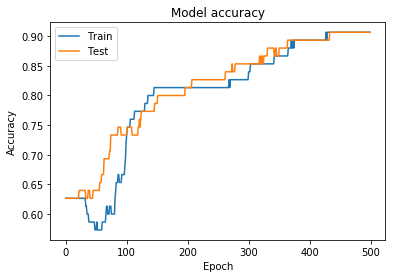

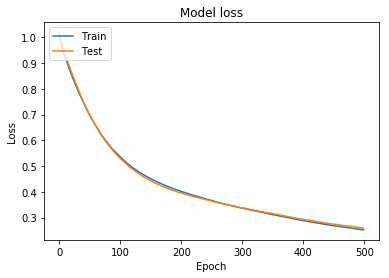

In [27]:
plot_training()

#### Prediktion och tolkning

Vi predicerar de 5 första observationerna från vårt test-data

In [18]:
np.set_printoptions(precision=3)

# Anger vilken kategori , tillbaka till 0 = 'setosa' 1 = 'versicolor', 2 = 'virginica'
category = multinomial_log_reg_model.predict_classes(X_test[0:5])

probabilities = multinomial_log_reg_model.predict_proba(X_test[0:5])


print("\nPredicerad kategori\n",category)

print("\nSannolikheter bakom prediktioner\n",names,"\n",probabilities)

print("\nDen sanna kategorin\n",Y_test[0:5])


Predicerad kategori
 [0 0 2 0 0]

Sannolikheter bakom prediktioner
 ['setosa' 'versicolor' 'virginica'] 
 [[9.979e-01 2.058e-03 5.229e-06]
 [9.898e-01 1.015e-02 1.494e-05]
 [1.719e-04 3.684e-01 6.315e-01]
 [9.806e-01 1.937e-02 1.930e-05]
 [9.952e-01 4.798e-03 1.331e-05]]

Den sanna kategorin
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Neuralt nätverk

- Vi har nu utvärderat likheterna mellan ett neuralt nätverk och logistisk regression
- Neurala nätverks styrka är inte att replikera logistisk regression, utan att kunna hantera komplexare samband än en logistisk regression genom att introducera icke-linjaritet med hjälp av ett antal hidden layers, inte bara ett lager som vi använt ovan 


Skillnaden mot multinomial regression är att vi nu har flera lager (5) istället för 1: 
- Ett input lager som hanterar våra fyra features som input, har 5 noder och ReLU-aktivering
- 3 efterföljande hidden layers med 5 noder, ReLU-aktivering
- Det output lager som vi känner igen: softmax-aktivering som beräknar 3 värden, 0-1 hur sannolik observationen är var och en av våra 3 blomkategorier

In [19]:
# Skapar återigen ett tomt, sekventiellt nätverk
neural_network_model = Sequential()


nodes = 5 # Noder i hidden layer. TESTA ATT ÄNDRA ANTALET NODER

# Input lager, n_features=4
neural_network_model.add(Dense(nodes, input_dim=n_features, activation='relu'))

#Hidden lager
neural_network_model.add(Dense(nodes, activation='relu'))
neural_network_model.add(Dense(nodes, activation='relu'))
neural_network_model.add(Dense(nodes, activation='relu'))


#Output lager, n_classes=3
neural_network_model.add(Dense(n_classes, activation='softmax'))


neural_network_model.compile(optimizers='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

neural_network_model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 18        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


### Träning av modell

In [20]:
history = neural_network_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))


Train on 75 samples, validate on 75 samples
Epoch 1/500
75/75 [==============================] - 1s 14ms/sample - loss: 1.0944 - accuracy: 0.3333 - val_loss: 1.0920 - val_accuracy: 0.6267
Epoch 2/500
75/75 [==============================] - 0s 263us/sample - loss: 1.0925 - accuracy: 0.5733 - val_loss: 1.0909 - val_accuracy: 0.6667
Epoch 3/500
75/75 [==============================] - 0s 312us/sample - loss: 1.0911 - accuracy: 0.6533 - val_loss: 1.0896 - val_accuracy: 0.6667
Epoch 4/500
75/75 [==============================] - 0s 415us/sample - loss: 1.0900 - accuracy: 0.6667 - val_loss: 1.0883 - val_accuracy: 0.6667
Epoch 5/500
75/75 [==============================] - 0s 559us/sample - loss: 1.0887 - accuracy: 0.6667 - val_loss: 1.0871 - val_accuracy: 0.6667
Epoch 6/500
75/75 [==============================] - 0s 314us/sample - loss: 1.0872 - accuracy: 0.6667 - val_loss: 1.0857 - val_accuracy: 0.6667
Epoch 7/500
75/75 [==============================] - 0s 301us/sample - loss: 1.0857 - a

Epoch 57/500
75/75 [==============================] - 0s 428us/sample - loss: 0.8309 - accuracy: 0.8667 - val_loss: 0.8010 - val_accuracy: 0.8933
Epoch 58/500
75/75 [==============================] - 0s 272us/sample - loss: 0.8232 - accuracy: 0.8667 - val_loss: 0.7916 - val_accuracy: 0.9067
Epoch 59/500
75/75 [==============================] - 0s 296us/sample - loss: 0.8150 - accuracy: 0.8000 - val_loss: 0.7825 - val_accuracy: 0.8933
Epoch 60/500
75/75 [==============================] - 0s 317us/sample - loss: 0.8073 - accuracy: 0.8667 - val_loss: 0.7747 - val_accuracy: 0.8933
Epoch 61/500
75/75 [==============================] - 0s 291us/sample - loss: 0.8002 - accuracy: 0.8667 - val_loss: 0.7664 - val_accuracy: 0.9067
Epoch 62/500
75/75 [==============================] - 0s 300us/sample - loss: 0.7927 - accuracy: 0.8667 - val_loss: 0.7580 - val_accuracy: 0.9067
Epoch 63/500
75/75 [==============================] - 0s 292us/sample - loss: 0.7855 - accuracy: 0.8533 - val_loss: 0.7502 -

75/75 [==============================] - 0s 316us/sample - loss: 0.5752 - accuracy: 0.8933 - val_loss: 0.5366 - val_accuracy: 0.9200
Epoch 114/500
75/75 [==============================] - 0s 325us/sample - loss: 0.5715 - accuracy: 0.8933 - val_loss: 0.5341 - val_accuracy: 0.9200
Epoch 115/500
75/75 [==============================] - 0s 286us/sample - loss: 0.5679 - accuracy: 0.8933 - val_loss: 0.5304 - val_accuracy: 0.9200
Epoch 116/500
75/75 [==============================] - 0s 321us/sample - loss: 0.5645 - accuracy: 0.8933 - val_loss: 0.5275 - val_accuracy: 0.9200
Epoch 117/500
75/75 [==============================] - 0s 326us/sample - loss: 0.5613 - accuracy: 0.8933 - val_loss: 0.5252 - val_accuracy: 0.9200
Epoch 118/500
75/75 [==============================] - 0s 310us/sample - loss: 0.5577 - accuracy: 0.9067 - val_loss: 0.5222 - val_accuracy: 0.9200
Epoch 119/500
75/75 [==============================] - 0s 313us/sample - loss: 0.5543 - accuracy: 0.9067 - val_loss: 0.5196 - val_ac

Epoch 224/500
75/75 [==============================] - 0s 299us/sample - loss: 0.2581 - accuracy: 0.9867 - val_loss: 0.2959 - val_accuracy: 0.9467
Epoch 225/500
75/75 [==============================] - 0s 297us/sample - loss: 0.2552 - accuracy: 0.9867 - val_loss: 0.2932 - val_accuracy: 0.9467
Epoch 226/500
75/75 [==============================] - 0s 310us/sample - loss: 0.2530 - accuracy: 0.9867 - val_loss: 0.2942 - val_accuracy: 0.9467
Epoch 227/500
75/75 [==============================] - 0s 297us/sample - loss: 0.2503 - accuracy: 0.9867 - val_loss: 0.2910 - val_accuracy: 0.9467
Epoch 228/500
75/75 [==============================] - 0s 317us/sample - loss: 0.2474 - accuracy: 0.9867 - val_loss: 0.2871 - val_accuracy: 0.9467
Epoch 229/500
75/75 [==============================] - 0s 369us/sample - loss: 0.2448 - accuracy: 0.9867 - val_loss: 0.2851 - val_accuracy: 0.9467
Epoch 230/500
75/75 [==============================] - 0s 311us/sample - loss: 0.2422 - accuracy: 0.9867 - val_loss: 0

Epoch 335/500
75/75 [==============================] - 0s 413us/sample - loss: 0.0934 - accuracy: 1.0000 - val_loss: 0.2181 - val_accuracy: 0.9467
Epoch 336/500
75/75 [==============================] - 0s 422us/sample - loss: 0.0931 - accuracy: 1.0000 - val_loss: 0.2172 - val_accuracy: 0.9467
Epoch 337/500
75/75 [==============================] - 0s 297us/sample - loss: 0.0921 - accuracy: 1.0000 - val_loss: 0.2170 - val_accuracy: 0.9467
Epoch 338/500
75/75 [==============================] - 0s 287us/sample - loss: 0.0923 - accuracy: 1.0000 - val_loss: 0.2203 - val_accuracy: 0.9467
Epoch 339/500
75/75 [==============================] - 0s 316us/sample - loss: 0.0917 - accuracy: 1.0000 - val_loss: 0.2195 - val_accuracy: 0.9467
Epoch 340/500
75/75 [==============================] - 0s 300us/sample - loss: 0.0907 - accuracy: 1.0000 - val_loss: 0.2223 - val_accuracy: 0.9467
Epoch 341/500
75/75 [==============================] - 0s 361us/sample - loss: 0.0904 - accuracy: 1.0000 - val_loss: 0

75/75 [==============================] - 0s 318us/sample - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.2795 - val_accuracy: 0.9333
Epoch 446/500
75/75 [==============================] - 0s 297us/sample - loss: 0.0438 - accuracy: 1.0000 - val_loss: 0.2794 - val_accuracy: 0.9333
Epoch 447/500
75/75 [==============================] - 0s 301us/sample - loss: 0.0436 - accuracy: 1.0000 - val_loss: 0.2779 - val_accuracy: 0.9467
Epoch 448/500
75/75 [==============================] - 0s 290us/sample - loss: 0.0433 - accuracy: 1.0000 - val_loss: 0.2814 - val_accuracy: 0.9467
Epoch 449/500
75/75 [==============================] - 0s 284us/sample - loss: 0.0432 - accuracy: 1.0000 - val_loss: 0.2863 - val_accuracy: 0.9333
Epoch 450/500
75/75 [==============================] - 0s 365us/sample - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.2881 - val_accuracy: 0.9333
Epoch 451/500
75/75 [==============================] - 0s 322us/sample - loss: 0.0428 - accuracy: 1.0000 - val_loss: 0.2871 - val_ac

 #### Utvärdering
 - Hur ser accuracy och loss ut för tränings- och valideringsdata?
 - med 5 lager och 5 noder i varje lager utom output-lagret har vi 133 träningsbara parametrar. Är det rimligt givet 75 obs i träningsdata setet?
 - Övertränar nätverket på träningsdatat?
 - Vad händer om du förändrar antalet noder i vår modell, hur påverkar det accuracy för tränings och valideringsdata?

accuracy, train:  1.0
accuracy, test:  0.9066667


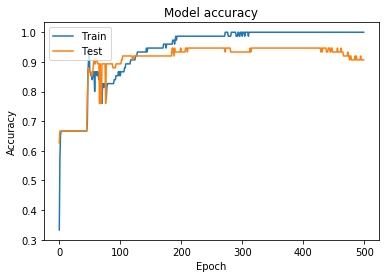

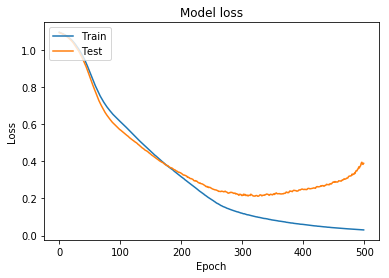

In [21]:
plot_training()


#### Prediktion och tolkning

Vi predicerar de 5 första observationerna från vårt test-data

In [22]:
np.set_printoptions(precision=3)

# Anger vilken kategori , tillbaka till 0 = 'setosa' 1 = 'versicolor', 2 = 'virginica'
category = neural_network_model.predict_classes(X_test[0:5])

probabilities = neural_network_model.predict_proba(X_test[0:5])


print("\nPredicerad kategori\n",category)

print("\nSannolikheter bakom prediktionerna\n",names,"\n",probabilities)

print("\nDen sanna kategorin\n",Y_test[0:5])


Predicerad kategori
 [0 0 1 0 0]

Sannolikheter bakom prediktionerna
 ['setosa' 'versicolor' 'virginica'] 
 [[9.993e-01 6.696e-04 0.000e+00]
 [9.974e-01 2.612e-03 0.000e+00]
 [3.062e-02 5.647e-01 4.046e-01]
 [9.967e-01 3.251e-03 0.000e+00]
 [9.987e-01 1.289e-03 0.000e+00]]

Den sanna kategorin
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Neurala nätverk - Regularisering

Vi testar att köra vårat överdrivet stora neurala nätverk igen, denna gång med L1 och L2-regularisering
- Vi utvärderar om introduktion av L1 och L2-regularisering kan mitigera överträning på träningsdatat
- Testa gärna att förändra  antal_hidden_layer, antal_noder samt l1- / l2_reg_rate och utforska vad som händer

In [23]:
# Storlek på Neuralt Nätverk
antal_hidden_layer = 3 # Djup
antal_noder = 5 # Bredd per lager

#Regulariseringsparametrar
l1_reg_rate = 0.01
l2_reg_rate = 0.01

# Definiera forward propagation
neural_network_model = Sequential()

# Input lager 
neural_network_model.add(Dense(antal_noder, input_dim=4, activation='relu'))

#Hidden lager
for l in range(antal_hidden_layer):
    neural_network_model.add(Dense(antal_noder, activation='relu', kernel_regularizer=L1L2(l1=l1_reg_rate, l2=l2_reg_rate)))

#Output lager
neural_network_model.add(Dense(3, activation='softmax'))


neural_network_model.compile(optimizers='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

neural_network_model.summary()

history = neural_network_model.fit(X_train,Y_train, epochs=500, validation_data=(X_test,Y_test))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 18        
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
Train on 75 samples, validate on 75 samples
Epoch 1/500
75/75 [==============================] - 1s 17ms/sample - loss: 1.

Epoch 50/500
75/75 [==============================] - 0s 268us/sample - loss: 1.1805 - accuracy: 0.5867 - val_loss: 1.1986 - val_accuracy: 0.6267
Epoch 51/500
75/75 [==============================] - 0s 286us/sample - loss: 1.1752 - accuracy: 0.6000 - val_loss: 1.1931 - val_accuracy: 0.6267
Epoch 52/500
75/75 [==============================] - 0s 310us/sample - loss: 1.1695 - accuracy: 0.6000 - val_loss: 1.1869 - val_accuracy: 0.6267
Epoch 53/500
75/75 [==============================] - 0s 377us/sample - loss: 1.1637 - accuracy: 0.6000 - val_loss: 1.1819 - val_accuracy: 0.6267
Epoch 54/500
75/75 [==============================] - 0s 341us/sample - loss: 1.1583 - accuracy: 0.6000 - val_loss: 1.1760 - val_accuracy: 0.6267
Epoch 55/500
75/75 [==============================] - 0s 273us/sample - loss: 1.1539 - accuracy: 0.6133 - val_loss: 1.1718 - val_accuracy: 0.6400
Epoch 56/500
75/75 [==============================] - 0s 332us/sample - loss: 1.1479 - accuracy: 0.6133 - val_loss: 1.1654 -

75/75 [==============================] - 0s 338us/sample - loss: 0.9427 - accuracy: 0.8133 - val_loss: 0.9640 - val_accuracy: 0.8133
Epoch 107/500
75/75 [==============================] - 0s 466us/sample - loss: 0.9395 - accuracy: 0.8133 - val_loss: 0.9604 - val_accuracy: 0.8133
Epoch 108/500
75/75 [==============================] - 0s 498us/sample - loss: 0.9365 - accuracy: 0.8133 - val_loss: 0.9568 - val_accuracy: 0.8133
Epoch 109/500
75/75 [==============================] - 0s 321us/sample - loss: 0.9338 - accuracy: 0.8000 - val_loss: 0.9540 - val_accuracy: 0.8133
Epoch 110/500
75/75 [==============================] - 0s 548us/sample - loss: 0.9295 - accuracy: 0.8133 - val_loss: 0.9493 - val_accuracy: 0.8267
Epoch 111/500
75/75 [==============================] - 0s 402us/sample - loss: 0.9256 - accuracy: 0.8133 - val_loss: 0.9458 - val_accuracy: 0.8267
Epoch 112/500
75/75 [==============================] - 0s 699us/sample - loss: 0.9231 - accuracy: 0.8400 - val_loss: 0.9436 - val_ac

Epoch 217/500
75/75 [==============================] - 0s 311us/sample - loss: 0.6594 - accuracy: 0.8800 - val_loss: 0.7006 - val_accuracy: 0.8933
Epoch 218/500
75/75 [==============================] - 0s 267us/sample - loss: 0.6564 - accuracy: 0.8533 - val_loss: 0.7040 - val_accuracy: 0.8933
Epoch 219/500
75/75 [==============================] - 0s 323us/sample - loss: 0.6543 - accuracy: 0.8533 - val_loss: 0.6951 - val_accuracy: 0.8933
Epoch 220/500
75/75 [==============================] - 0s 299us/sample - loss: 0.6524 - accuracy: 0.8667 - val_loss: 0.6991 - val_accuracy: 0.8933
Epoch 221/500
75/75 [==============================] - 0s 422us/sample - loss: 0.6501 - accuracy: 0.8533 - val_loss: 0.6944 - val_accuracy: 0.8933
Epoch 222/500
75/75 [==============================] - 0s 340us/sample - loss: 0.6494 - accuracy: 0.8533 - val_loss: 0.6916 - val_accuracy: 0.8933
Epoch 223/500
75/75 [==============================] - 0s 342us/sample - loss: 0.6461 - accuracy: 0.8533 - val_loss: 0

Epoch 273/500
75/75 [==============================] - 0s 326us/sample - loss: 0.5495 - accuracy: 0.9467 - val_loss: 0.6060 - val_accuracy: 0.9333
Epoch 274/500
75/75 [==============================] - 0s 288us/sample - loss: 0.5456 - accuracy: 0.9467 - val_loss: 0.6064 - val_accuracy: 0.9333
Epoch 275/500
75/75 [==============================] - 0s 399us/sample - loss: 0.5439 - accuracy: 0.9467 - val_loss: 0.5946 - val_accuracy: 0.9333
Epoch 276/500
75/75 [==============================] - 0s 423us/sample - loss: 0.5414 - accuracy: 0.9467 - val_loss: 0.5942 - val_accuracy: 0.9333
Epoch 277/500
75/75 [==============================] - 0s 412us/sample - loss: 0.5414 - accuracy: 0.9467 - val_loss: 0.5873 - val_accuracy: 0.9333
Epoch 278/500
75/75 [==============================] - 0s 413us/sample - loss: 0.5410 - accuracy: 0.9467 - val_loss: 0.5865 - val_accuracy: 0.9333
Epoch 279/500
75/75 [==============================] - 0s 459us/sample - loss: 0.5367 - accuracy: 0.9467 - val_loss: 0

Epoch 329/500
75/75 [==============================] - 0s 390us/sample - loss: 0.4567 - accuracy: 0.9733 - val_loss: 0.5223 - val_accuracy: 0.9333
Epoch 330/500
75/75 [==============================] - 0s 542us/sample - loss: 0.4555 - accuracy: 0.9733 - val_loss: 0.5249 - val_accuracy: 0.9333
Epoch 331/500
75/75 [==============================] - 0s 672us/sample - loss: 0.4538 - accuracy: 0.9733 - val_loss: 0.5192 - val_accuracy: 0.9333
Epoch 332/500
75/75 [==============================] - 0s 381us/sample - loss: 0.4522 - accuracy: 0.9733 - val_loss: 0.5148 - val_accuracy: 0.9333
Epoch 333/500
75/75 [==============================] - 0s 394us/sample - loss: 0.4521 - accuracy: 0.9733 - val_loss: 0.5066 - val_accuracy: 0.9333
Epoch 334/500
75/75 [==============================] - 0s 371us/sample - loss: 0.4502 - accuracy: 0.9733 - val_loss: 0.5147 - val_accuracy: 0.9333
Epoch 335/500
75/75 [==============================] - 0s 371us/sample - loss: 0.4482 - accuracy: 0.9733 - val_loss: 0

Epoch 385/500
75/75 [==============================] - 0s 499us/sample - loss: 0.3890 - accuracy: 0.9733 - val_loss: 0.4629 - val_accuracy: 0.9333
Epoch 386/500
75/75 [==============================] - 0s 449us/sample - loss: 0.3880 - accuracy: 0.9733 - val_loss: 0.4540 - val_accuracy: 0.9333
Epoch 387/500
75/75 [==============================] - 0s 358us/sample - loss: 0.3873 - accuracy: 0.9733 - val_loss: 0.4517 - val_accuracy: 0.9333
Epoch 388/500
75/75 [==============================] - 0s 316us/sample - loss: 0.3871 - accuracy: 0.9733 - val_loss: 0.4550 - val_accuracy: 0.9333
Epoch 389/500
75/75 [==============================] - 0s 309us/sample - loss: 0.3862 - accuracy: 0.9733 - val_loss: 0.4526 - val_accuracy: 0.9333
Epoch 390/500
75/75 [==============================] - 0s 324us/sample - loss: 0.3850 - accuracy: 0.9733 - val_loss: 0.4433 - val_accuracy: 0.9333
Epoch 391/500
75/75 [==============================] - 0s 311us/sample - loss: 0.3848 - accuracy: 0.9600 - val_loss: 0

Epoch 441/500
75/75 [==============================] - 0s 306us/sample - loss: 0.3452 - accuracy: 0.9733 - val_loss: 0.4238 - val_accuracy: 0.9333
Epoch 442/500
75/75 [==============================] - 0s 280us/sample - loss: 0.3453 - accuracy: 0.9733 - val_loss: 0.4090 - val_accuracy: 0.9333
Epoch 443/500
75/75 [==============================] - 0s 292us/sample - loss: 0.3448 - accuracy: 0.9600 - val_loss: 0.4148 - val_accuracy: 0.9333
Epoch 444/500
75/75 [==============================] - 0s 290us/sample - loss: 0.3438 - accuracy: 0.9733 - val_loss: 0.4066 - val_accuracy: 0.9333
Epoch 445/500
75/75 [==============================] - 0s 344us/sample - loss: 0.3431 - accuracy: 0.9733 - val_loss: 0.4155 - val_accuracy: 0.9333
Epoch 446/500
75/75 [==============================] - 0s 360us/sample - loss: 0.3433 - accuracy: 0.9733 - val_loss: 0.4128 - val_accuracy: 0.9333
Epoch 447/500
75/75 [==============================] - 0s 278us/sample - loss: 0.3423 - accuracy: 0.9733 - val_loss: 0

Epoch 497/500
75/75 [==============================] - 0s 516us/sample - loss: 0.3163 - accuracy: 0.9600 - val_loss: 0.3915 - val_accuracy: 0.9333
Epoch 498/500
75/75 [==============================] - 0s 303us/sample - loss: 0.3155 - accuracy: 0.9867 - val_loss: 0.3906 - val_accuracy: 0.9333
Epoch 499/500
75/75 [==============================] - 0s 334us/sample - loss: 0.3158 - accuracy: 0.9867 - val_loss: 0.3945 - val_accuracy: 0.9333
Epoch 500/500
75/75 [==============================] - 0s 289us/sample - loss: 0.3156 - accuracy: 0.9733 - val_loss: 0.3940 - val_accuracy: 0.9333


 #### Utvärdering
 - Hur ser accuracy och loss ut för tränings- och valideringsdata?
 - Löser regularisering vårt problem med överträning?

accuracy, train:  0.85333335
accuracy, test:  0.8933333


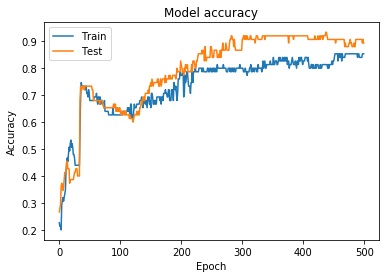

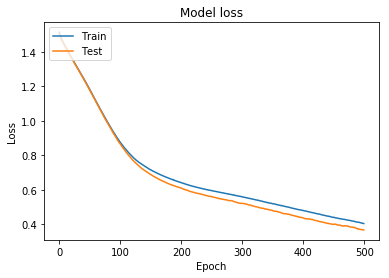

In [40]:
plot_training()

### Slutsats

- I denna övning har vi utforskat likheterna mellan neurala nätverk och logistisk regression


- Introducerat större neurala nätverk och de komplexa samband som kan hanteras mha icke-linjaritet


- Utforskat vad som händer om du bygger för stort neuralt nätverk relativt till träningsdata


- Redovisat att regularisering kan öka neurala nätverkets generaliserbarhet till test-datat